# Convective Mode Maps

In [1]:
import xarray as xr
import xoak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import regionmask
import cartopy
import cartopy.crs as ccrs
import glob

## Definitions

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 30, 30

def mask_data(in_data):
    
    '''
    A defintion masking data in the US, east of the Rockies. 
    
    Parameters
    ----------
    in_data: xarray dataset
    
    Returns
    -------
    out_data: a masked xarray dataset
    
    '''
    
    usa = gpd.read_file("/home/jcorner1/Unidata/shapefiles/smoothing_econus.shp")

    state_mask = regionmask.mask_geopandas(usa, in_data.lon, in_data.lat)
    ma = state_mask.values
    ma[~np.isnan(ma)] = 1

    out_data = in_data * ma
    
    return out_data

In [3]:
def Data_Conv(ds):
    
    '''
    A defintion  
    
    Parameters
    ----------
    ds: xarray dataset
    
    Returns
    -------
    ds_mask: a masked xarray dataset
    
    '''
    geog = xr.open_dataset("/home/scratch/ahaberlie/simgeog/geo_em.d01.nc")
    geog = geog[['CLAT', 'CLONG']].coarsen(south_north=20, west_east=20, boundary='trim').mean()
    
    ds = ds.coarsen(south_north=20, west_east=20, boundary='trim').sum()
    ds = xr.merge([ds, geog.squeeze()])
    ds = ds.rename({"CLONG": 'lon', 'CLAT': 'lat'})

    ds = ds.assign_coords({'x': ds.west_east, 'y': ds.south_north})
    ds = ds.assign_coords({'lon': ds.lon, 'lat': ds.lat})
    ds.xoak.set_index(['lat', 'lon'], 'sklearn_geo_balltree')
    
    #mask out area 
    ds_mask = mask_data(ds)
    
    
    return ds_mask

## Data

In [4]:
ds = xr.open_dataset('/home/scratch/ahaberlie/AFWA_2-5KM_UPDRAFT_HELICITY/HIST/1990-1991/UP_HELI_MAX_historical-1990-1991_1990-10-01.nc')
ds = ds.sel(Time ='1990-10-01T00:00:00.000000000')
ds_copy = ds.copy()
ds_copy

<xarray.Dataset>
Dimensions:      (south_north: 899, west_east: 1399)
Coordinates:
    Time         datetime64[ns] 1990-10-01
Dimensions without coordinates: south_north, west_east
Data variables:
    UP_HELI_MAX  (south_north, west_east) float32 ...
Attributes: (12/92)
    TITLE:                            OUTPUT FROM WRF V4.1.2 MODEL
    START_DATE:                      1990-10-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        1400
    SOUTH-NORTH_GRID_DIMENSION:      900
    BOTTOM-TOP_GRID_DIMENSION:       51
    DX:                              3750.0
    ...                              ...
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    first_file:                      /glade/campaign/univ/unid0001/historical...
    last_file:                       /glade/campaign/univ/unid0001/historical...
    first_time:                      1990-10-01T00:00:00.000000000
    last_time:                       1990-10-01T23:00:00.000000000
    simulation:                      historical

In [8]:
files = glob.glob('/home/jcorner1/Unidata/csv/*4p5*.csv')
files.sort()
files

['/home/jcorner1/Unidata/csv/storm_modes_2086_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2087_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2088_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2089_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2090_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2091_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2092_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2093_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2094_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2095_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2096_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2097_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2098_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2099_eoc4p5.csv',
 '/home/jcorner1/Unidata/csv/storm_modes_2100_eoc4p5.csv']

In [9]:
# merge csv files
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

,Unnamed: 0,x,y,Filename,Time,Mode
0,0,926,439,10032085_T20_0id.npy,2085-10-03T20:00:00.000000000,tightly_clustered_cells
1,1,927,439,10032085_T20_1id.npy,2085-10-03T20:00:00.000000000,tightly_clustered_cells
2,2,968,445,10072085_T00_2id.npy,2085-10-07T00:00:00.000000000,tightly_clustered_cells
3,3,969,445,10072085_T00_3id.npy,2085-10-07T00:00:00.000000000,tightly_clustered_cells
4,4,967,446,10072085_T00_4id.npy,2085-10-07T00:00:00.000000000,tightly_clustered_cells
...,...,...,...,...,...,...
162977,5543,810,478,09292100_T00_6358id.npy,2100-09-29T00:00:00.000000000,loosely_clustered_cells
162978,5544,804,479,09292100_T00_6359id.npy,2100-09-29T00:00:00.000000000,loosely_clustered_cells
162979,5545,805,479,09292100_T00_6360id.npy,2100-09-29T00:00:00.000000000,loosely_clustered_cells
162980,5546,806,479,09292100_T00_6361id.npy,2100-09-29T00:00:00.000000000,loosely_clustered_cells


In [10]:
df['Time'] =  pd.to_datetime(df['Time'])

ValueError: Given date string 20 not likely a datetime present at position 2641

In [29]:
modes = ['isolated_cell', 'multiple_isolated_cells', 'loosely_clustered_cells', 'tightly_clustered_cells', 'qlcs', 'other']


for mode in modes:
    
    print(mode)
    
    locals()[f'{mode}_blanks'] = np.zeros((899,1399))
    cur_mode = df[(df['Mode'] == mode)]
    
    for rid, row in cur_mode.iterrows():
        locals()[f'{mode}_blanks'][row['y'], row['x']] = locals()[f'{mode}_blanks'][row['y'], row['x']] + 1
    
    locals()[f'{mode}_blanks'][locals()[f'{mode}_blanks'] == 0.0] = np.nan
    
    locals()[f'ds_{mode}'] = ds_copy.assign(UP_HELI_MAX = (('south_north', 'west_east'), locals()[f'{mode}_blanks']))

    locals()[f'ds_cov_{mode}'] =  Data_Conv(locals()[f'ds_{mode}'])
    print(np.nanmax(locals()[f'ds_cov_{mode}'].UP_HELI_MAX.values))

isolated_cell
58.0
multiple_isolated_cells
87.0
loosely_clustered_cells
63.0
tightly_clustered_cells
498.0
qlcs
235.0
other
241.0


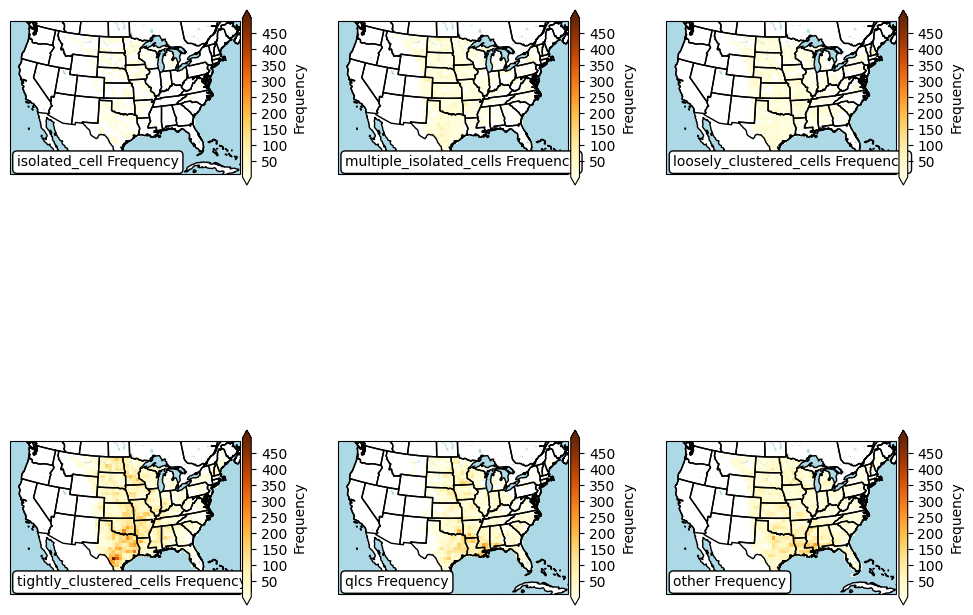

In [30]:
#Plot the data
fig = plt.figure()
#plt.rcParams['figure.figsize'] = 10, 10
fig.set_size_inches(12, 10)

for i in range(len(modes)):

    ax = plt.subplot(2,3,i+1, projection=ccrs.LambertConformal(central_longitude=-98, central_latitude=35))

    data = locals()[f'ds_cov_{modes[i]}'].UP_HELI_MAX.values
    data[data==0] = np.nan

    c = ax.pcolormesh(locals()[f'ds_cov_{mode}'].lon.values, locals()[f'ds_cov_{mode}'].lat.values, data, transform=cartopy.crs.PlateCarree(), cmap='YlOrBr', vmax=int(np.nanmax(ds_cov_tightly_clustered_cells.UP_HELI_MAX.values)))

    ax.add_feature(cartopy.feature.STATES, zorder=2)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.LAND, facecolor='white')
    ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
    ax.add_feature(cartopy.feature.LAKES, facecolor='lightblue')

    ax.set_extent([-120, -74, 20, 50])


    cbar = plt.colorbar(c, shrink=0.5, pad=0.01, extend='both', ticks=list(range(0, 500, 50)), ax=ax)
    cbar.ax.tick_params(labelsize=10)
    cbar.set_label(label='Frequency', size=10)


    ax.annotate(f'{modes[i]} Frequency', (0.03,0.05), xycoords='axes fraction',fontsize=10, 
                            bbox=dict(boxstyle='round', facecolor='w', alpha=1), color='k',zorder=25)

In [14]:

for i in range(8):

    hour_df = df[(df['Time'].dt.hour == (i*3 or 1+i*3 or 2+i*3))]
    
    for j in range(len(modes)):
    
        locals()[f'{modes[j]}_blanks_{i*3}-{2+i*3}'] = np.zeros((899,1399))
        mode_df = hour_df[(hour_df['Mode'] == modes[j])]
        
        for rid, row in mode_df.iterrows():
            locals()[f'{modes[j]}_blanks_{i*3}-{2+i*3}'][row['y'], row['x']] = locals()[f'{modes[j]}_blanks_{i*3}-{2+i*3}'][row['y'], row['x']] + 1
            
        locals()[f'{modes[j]}_blanks_{i*3}-{2+i*3}'][locals()[f'{modes[j]}_blanks_{i*3}-{2+i*3}'] == 0.0] = np.nan
        
        locals()[f'ds_{modes[j]}_{i*3}-{2+i*3}'] = ds_copy.assign(UP_HELI_MAX = (('south_north', 'west_east'), locals()[f'{modes[j]}_blanks_{i*3}-{2+i*3}']))

        locals()[f'ds_cov_{modes[j]}_{i*3}-{2+i*3}'] =  Data_Conv(locals()[f'ds_{modes[j]}_{i*3}-{2+i*3}'])
        val = np.nanmax(locals()[f'ds_cov_{modes[j]}_{i*3}-{2+i*3}'].UP_HELI_MAX.values)
        print(f'there is a max of {val} for all {modes[j]} for all dates through the hour of {i*3}-{2+i*3} UTC')

there is a max of 27.0 for all isolated_cell for all dates through the hour of 0-2 UTC
there is a max of 32.0 for all multiple_isolated_cells for all dates through the hour of 0-2 UTC
there is a max of 30.0 for all loosely_clustered_cells for all dates through the hour of 0-2 UTC
there is a max of 99.0 for all tightly_clustered_cells for all dates through the hour of 0-2 UTC
there is a max of 116.0 for all qlcs for all dates through the hour of 0-2 UTC
there is a max of 73.0 for all other for all dates through the hour of 0-2 UTC
there is a max of 23.0 for all isolated_cell for all dates through the hour of 3-5 UTC
there is a max of 33.0 for all multiple_isolated_cells for all dates through the hour of 3-5 UTC
there is a max of 40.0 for all loosely_clustered_cells for all dates through the hour of 3-5 UTC
there is a max of 101.0 for all tightly_clustered_cells for all dates through the hour of 3-5 UTC
there is a max of 108.0 for all qlcs for all dates through the hour of 3-5 UTC
there 

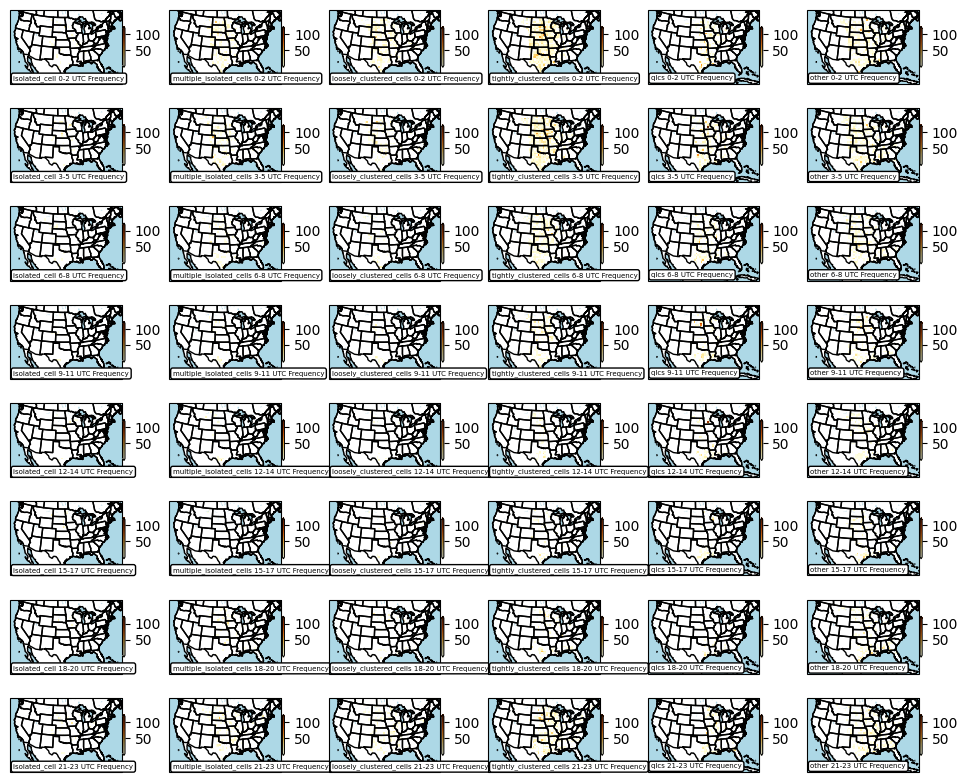

In [35]:
#Plot the data
fig = plt.figure()
plt.rcParams['figure.figsize'] = 12,15
#fig.set_size_inches(15, 6)
ind = 1
for i in range(8):
    for j in range(len(modes)):

        ax = plt.subplot(8,6, ind, projection=ccrs.LambertConformal(central_longitude=-98, central_latitude=35))
        ind = ind + 1

        data = locals()[f'ds_cov_{modes[j]}_{i*3}-{2+i*3}'].UP_HELI_MAX.values
        data[data==0] = np.nan

        c = ax.pcolormesh(locals()[f'ds_cov_{modes[j]}_{i*3}-{2+i*3}'].lon.values, locals()[f'ds_cov_{modes[j]}_{i*3}-{2+i*3}'].lat.values, data, transform=cartopy.crs.PlateCarree(), cmap='YlOrBr', vmax=118.0)

        ax.add_feature(cartopy.feature.STATES, zorder=2)
        ax.add_feature(cartopy.feature.COASTLINE)
        ax.add_feature(cartopy.feature.LAND, facecolor='white')
        ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
        ax.add_feature(cartopy.feature.LAKES, facecolor='lightblue')

        ax.set_extent([-120, -74, 20, 50])


        cbar = plt.colorbar(c, shrink=0.5, pad=0.01, extend='both', ticks=list(range(0, 500, 50)), ax=ax)
        #cbar.ax.tick_params(labelsize=10)
        #cbar.set_label(label='Frequency', size=10)


        ax.annotate(f'{modes[j]} {i*3}-{2+i*3} UTC Frequency', (0.03,0.05), xycoords='axes fraction',fontsize=5, 
                                bbox=dict(boxstyle='round', facecolor='w', alpha=1), color='k',zorder=25)

In [25]:
DJF_df = df[(df['Time'].dt.month == (12 or 1 or 2))]
MAM_df = df[(df['Time'].dt.month == (3 or 4 or 5))]
JJA_df = df[(df['Time'].dt.month == (6 or 7 or 8))]
SON_df = df[(df['Time'].dt.month == (9 or 10 or 11))]

dataframes = ['DJF_df','MAM_df','JJA_df','SON_df']

for dataframe in dataframes:
    mon_df = locals()[dataframe]

    for mode in modes:
        mode_df = mon_df[(mon_df['Mode'] == mode)]
        locals()[f'{mode}_{dataframe[:3]}_blanks'] = np.zeros((899,1399))
        
        for rid, row in mode_df.iterrows():
            locals()[f'{mode}_{dataframe[:3]}_blanks'][row['y'], row['x']] = locals()[f'{mode}_{dataframe[:3]}_blanks'][row['y'], row['x']] + 1
            
        locals()[f'{mode}_{dataframe[:3]}_blanks'][locals()[f'{mode}_{dataframe[:3]}_blanks'] == 0.0] = np.nan
        
        locals()[f'ds_{mode}_{dataframe[:3]}'] = ds_copy.assign(UP_HELI_MAX = (('south_north', 'west_east'), locals()[f'{mode}_{dataframe[:3]}_blanks']))

        locals()[f'ds_cov_{mode}_{dataframe[:3]}'] =  Data_Conv(locals()[f'ds_{mode}_{dataframe[:3]}'])
        val = np.nanmax(locals()[f'ds_cov_{mode}_{dataframe[:3]}'].UP_HELI_MAX.values)
        print(f'there is a max of {val} for all {mode} for the months of {dataframe[:3]} UTC')
        

AttributeError: Can only use .dt accessor with datetimelike values

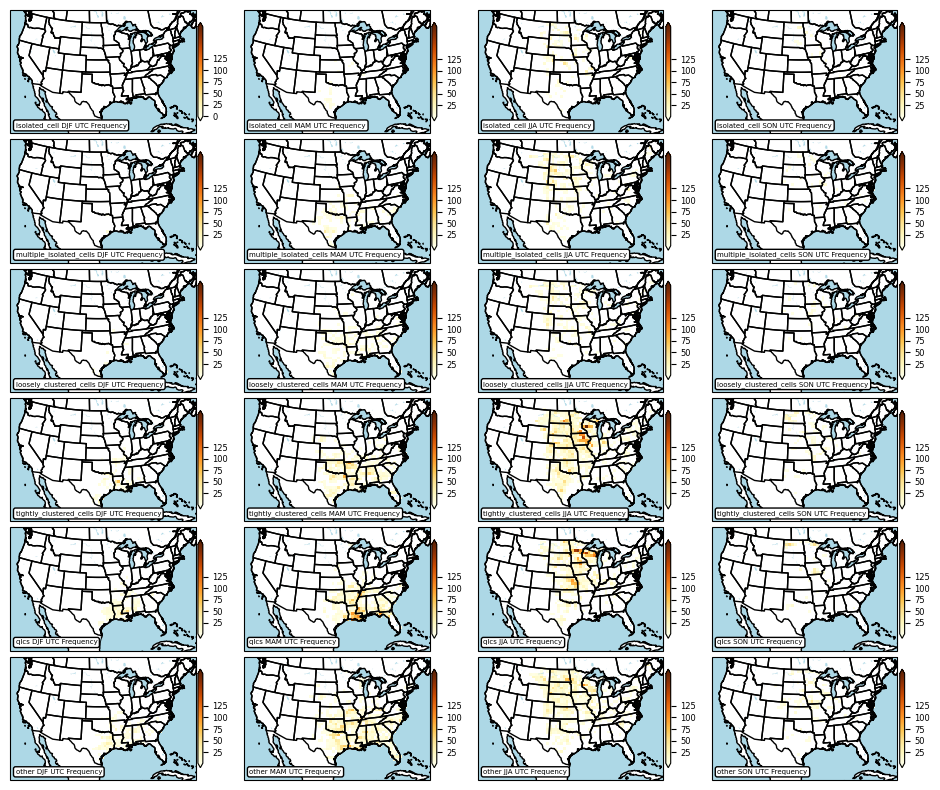

In [18]:
import matplotlib.gridspec as gridspec

ind = 1
plt.rcParams['figure.figsize'] = 12,10

gs1 = gridspec.GridSpec(6, 4)
gs1.update(wspace=0.025, hspace=0.05) 

for mode in modes:
    for dataframe in dataframes:
        
        ax = plt.subplot(gs1[ind-1], projection=ccrs.LambertConformal(central_longitude=-98, central_latitude=35))
        ind = ind + 1

        data = locals()[f'ds_cov_{mode}_{dataframe[:3]}'].UP_HELI_MAX.values
        data[data==0] = np.nan

        c = ax.pcolormesh(locals()[f'ds_cov_{mode}_{dataframe[:3]}'].lon.values, locals()[f'ds_cov_{mode}_{dataframe[:3]}'].lat.values, data, transform=cartopy.crs.PlateCarree(), cmap='YlOrBr', vmax=195.0)

        ax.add_feature(cartopy.feature.STATES, zorder=2)
        ax.add_feature(cartopy.feature.COASTLINE)
        ax.add_feature(cartopy.feature.LAND, facecolor='white')
        ax.add_feature(cartopy.feature.OCEAN, facecolor='lightblue')
        ax.add_feature(cartopy.feature.LAKES, facecolor='lightblue')

        ax.set_extent([-120, -74, 20, 50])


        cbar = plt.colorbar(c, shrink=0.8, pad=0.01, extend='both', ticks=list(range(0, 130, 25)), ax=ax)
        cbar.ax.tick_params(labelsize=6)
        #cbar.set_label(label='Frequency', size=10)


        ax.annotate(f'{mode} {dataframe[:3]} UTC Frequency', (0.03,0.05), xycoords='axes fraction',fontsize=5, 
                                bbox=dict(boxstyle='round', facecolor='w', alpha=1), color='k',zorder=25) 

#plt.subplots_adjust(wspace=None, hspace=None)